In [55]:
#imports
import pickle, pprint
import math
import netCDF4
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from tabulate import tabulate
import xarray as xr
import dask
import matplotlib
import matplotlib.colors as colors
import matplotlib.patches as patches
from matplotlib import ticker
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from mpl_toolkits.basemap import Basemap
bm = Basemap()
#import the relevant dataset
print('begin')
#Good_July.nc
path_to_file = '/fast/gmooers/Real_Geography_Manuscript/Preprocessed_Data/One_Month_July/full_physics_essentials_valid_month02_targets.nc'
real_ds = xr.open_dataset(path_to_file)

path_to_file = '/fast/gmooers/Real_Geography_Manuscript/Models/Good_July.nc'
test_ds = xr.open_dataset(path_to_file)

print('files imported')

precip_real_ds = np.squeeze(real_ds.targets[:,-1].values)*86400000.
precip_test_ds = np.squeeze(test_ds.Prediction[:,-1].values)*86400000.

times = real_ds.time.values

lats = real_ds.lat.values

lons = real_ds.lon.values

x = 144
y = 96
z = 30
t = int(len(precip_test_ds)/(x*y))
print(t)

SPCAM_Cycle = np.load("/fast/gmooers/RG_Paper_Data/Summer_Precip_Cycle_Truth.npy")

/export/home/gmooers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


begin
files imported
2975


In [56]:
path_to_file = '/fast/gmooers/Raw_Data/extras/TimestepOutput_Neuralnet_SPCAM_216.cam.h0.2018-07.nc'
land_frac = xr.open_dataset(path_to_file)
land_f = np.squeeze(land_frac.LANDFRAC.values)

new_land_frac = np.zeros(shape=(144, 96))
new_land_frac[:,:] = np.nan

for i in range(len(land_f)):
    for j in range(len(land_f[i])):
        new_land_frac[j, i] = land_f[i,j]

In [57]:
others = netCDF4.Dataset("/fast/gmooers/Raw_Data/extras/TimestepOutput_Neuralnet_SPCAM_216.cam.h1.2009-01-01-72000.nc")
plev = np.array(others.variables['lev'])
ps = np.array(others.variables['PS'])
g = 9.81 #m/s^2
#print(plev)
hyai = np.array(others.variables['hyai'])
hybi = np.array(others.variables['hybi'])
#print(hyai.shape)
#print(hyai)
cp = 1004.0
PS = 1e5
P0 = 1e5
P = P0*hyai+PS*hybi # Total pressure [Pa]
P=P/100.
P = P[:-1]

In [58]:
fz = 15*1.5
lw = 4
siz = 100
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YTEXT = 0.3 # Text placement

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams["font.serif"] = "STIX"
plt.rc('font', family='serif', size=fz)
matplotlib.rcParams['lines.linewidth'] = lw

In [59]:
ocean_precip_reconstructed_targets = np.zeros(shape=(x, y, t))
ocean_precip_reconstructed_features = np.zeros(shape=(x, y, t))

land_precip_reconstructed_targets = np.zeros(shape=(x, y, t))
land_precip_reconstructed_features = np.zeros(shape=(x, y, t))

count = 0
for i in range(t):
    for j in range(y):
        for k in range(x):
            A = precip_real_ds[count]
            B = precip_test_ds[count]
            
            ocean_precip_reconstructed_targets[k, j, i] = A 
            ocean_precip_reconstructed_features[k, j, i] = B
            
            land_precip_reconstructed_targets[k, j, i] = A 
            land_precip_reconstructed_features[k, j, i] = B
            count = count + 1

In [60]:
for i in range(len(precip_reconstructed_targets)):
    for j in range(len(precip_reconstructed_targets[i])):
        if np. isnan(SPCAM_Cycle[j,i]) == True:
            ocean_precip_reconstructed_targets[i,j,:] = np.nan
            ocean_precip_reconstructed_features[i,j,:] = np.nan
            land_precip_reconstructed_targets[i,j,:] = np.nan
            land_precip_reconstructed_features[i,j,:] = np.nan

In [61]:
ocean_diurnal_precip_reconstructed_targets = np.zeros(shape=(x, y, 96))
ocean_diurnal_precip_reconstructed_targets[:,:,:] = np.nan 
ocean_diurnal_precip_reconstructed_features = np.zeros(shape=(x, y, 96))
ocean_diurnal_precip_reconstructed_features[:,:,:] = np.nan 

land_diurnal_precip_reconstructed_targets = np.zeros(shape=(x, y, 96))
land_diurnal_precip_reconstructed_targets[:,:,:] = np.nan 
land_diurnal_precip_reconstructed_features = np.zeros(shape=(x, y, 96))
land_diurnal_precip_reconstructed_features[:,:,:] = np.nan 


for i in range(96):
    ocean_diurnal_precip_reconstructed_targets[:,:,i] = np.nanmean(ocean_precip_reconstructed_targets[:,:,i::96],axis=2)
    ocean_diurnal_precip_reconstructed_features[:,:,i] = np.nanmean(ocean_precip_reconstructed_features[:,:,i::96],axis=2)
    land_diurnal_precip_reconstructed_targets[:,:,i] = np.nanmean(land_precip_reconstructed_targets[:,:,i::96],axis=2)
    land_diurnal_precip_reconstructed_features[:,:,i] = np.nanmean(land_precip_reconstructed_features[:,:,i::96],axis=2)

/export/home/gmooers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]
/export/home/gmooers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  
/export/home/gmooers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app
/export/home/gmooers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()


In [62]:
all_lons = lons[:144]
new_lats = lats[::96]
all_lats = new_lats[:96]

In [63]:
for i in range(96):
    temp = np.squeeze(ocean_diurnal_precip_reconstructed_targets[:,:,i])
    temp[new_land_frac>0.5] = np.nan
    ocean_diurnal_precip_reconstructed_targets[:,:,i] = temp
    
    temp = np.squeeze(ocean_diurnal_precip_reconstructed_features[:,:,i])
    temp[new_land_frac>0.5] = np.nan
    ocean_diurnal_precip_reconstructed_features[:,:,i] = temp
    
    temp = np.squeeze(land_diurnal_precip_reconstructed_targets[:,:,i])
    temp[new_land_frac<0.5] = np.nan
    land_diurnal_precip_reconstructed_targets[:,:,i] = temp
    
    temp = np.squeeze(land_diurnal_precip_reconstructed_features[:,:,i])
    temp[new_land_frac<0.5] = np.nan
    land_diurnal_precip_reconstructed_features[:,:,i] = temp
    

    

In [64]:
ocean_precip_SPCAM5_composite = np.nanmean(ocean_diurnal_precip_reconstructed_targets, axis = 1)
ocean_precip_DNN_composite = np.nanmean(ocean_diurnal_precip_reconstructed_features, axis = 1)

land_precip_SPCAM5_composite = np.nanmean(land_diurnal_precip_reconstructed_targets, axis = 1)
land_precip_DNN_composite = np.nanmean(land_diurnal_precip_reconstructed_features, axis = 1)

/export/home/gmooers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/export/home/gmooers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/export/home/gmooers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/export/home/gmooers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """


In [65]:
ocean_lst_precip_SPCAM5_composite = np.zeros(shape=(144, 96))
ocean_lst_precip_SPCAM5_composite[:,:] = np.nan
land_lst_precip_SPCAM5_composite = np.zeros(shape=(144, 96))
land_lst_precip_SPCAM5_composite[:,:] = np.nan

ocean_lst_precip_DNN_composite = np.zeros(shape=(144, 96))
ocean_lst_precip_DNN_composite[:,:] = np.nan
land_lst_precip_DNN_composite = np.zeros(shape=(144, 96))
land_lst_precip_DNN_composite[:,:] = np.nan

for i in range(len(all_lons)):
    splitter = int(round((all_lons[i]/360.)*96.))
    part_a_precip_SPCAM5_composite = ocean_precip_SPCAM5_composite[i,:-splitter]
    part_b_precip_SPCAM5_composite = ocean_precip_SPCAM5_composite[i,-splitter:]
    combined_precip_SPCAM5_composite = np.concatenate((part_b_precip_SPCAM5_composite, part_a_precip_SPCAM5_composite), axis=0)
    ocean_lst_precip_SPCAM5_composite[i,:] = combined_precip_SPCAM5_composite
    
    part_a_precip_SPCAM5_composite = land_precip_SPCAM5_composite[i,:-splitter]
    part_b_precip_SPCAM5_composite = land_precip_SPCAM5_composite[i,-splitter:]
    combined_precip_SPCAM5_composite = np.concatenate((part_b_precip_SPCAM5_composite, part_a_precip_SPCAM5_composite), axis=0)
    land_lst_precip_SPCAM5_composite[i,:] = combined_precip_SPCAM5_composite
        
    part_a_precip_DNN_composite = ocean_precip_DNN_composite[i,:-splitter]
    part_b_precip_DNN_composite = ocean_precip_DNN_composite[i,-splitter:]
    combined_precip_DNN_composite = np.concatenate((part_b_precip_DNN_composite, part_a_precip_DNN_composite), axis=0)
    ocean_lst_precip_DNN_composite[i,:] = combined_precip_DNN_composite
    
    part_a_precip_DNN_composite = land_precip_DNN_composite[i,:-splitter]
    part_b_precip_DNN_composite = land_precip_DNN_composite[i,-splitter:]
    combined_precip_DNN_composite = np.concatenate((part_b_precip_DNN_composite, part_a_precip_DNN_composite), axis=0)
    land_lst_precip_DNN_composite[i,:] = combined_precip_DNN_composite

0 0.0
1 2.5
1 5.0
2 7.5
3 10.0
3 12.5
4 15.0
5 17.5
5 20.0
6 22.5
7 25.0
7 27.5
8 30.0
9 32.5
9 35.0
10 37.5
11 40.0
11 42.5
12 45.0
13 47.5
13 50.0
14 52.5
15 55.0
15 57.5
16 60.0
17 62.5
17 65.0
18 67.5
19 70.0
19 72.5
20 75.0
21 77.5
21 80.0
22 82.5
23 85.0
23 87.5
24 90.0
25 92.5
25 95.0
26 97.5
27 100.0
27 102.5
28 105.0
29 107.5
29 110.0
30 112.5
31 115.0
31 117.5
32 120.0
33 122.5
33 125.0
34 127.5
35 130.0
35 132.5
36 135.0
37 137.5
37 140.0
38 142.5
39 145.0
39 147.5
40 150.0
41 152.5
41 155.0
42 157.5
43 160.0
43 162.5
44 165.0
45 167.5
45 170.0
46 172.5
47 175.0
47 177.5
48 180.0
49 182.5
49 185.0
50 187.5
51 190.0
51 192.5
52 195.0
53 197.5
53 200.0
54 202.5
55 205.0
55 207.5
56 210.0
57 212.5
57 215.0
58 217.5
59 220.0
59 222.5
60 225.0
61 227.5
61 230.0
62 232.5
63 235.0
63 237.5
64 240.0
65 242.5
65 245.0
66 247.5
67 250.0
67 252.5
68 255.0
69 257.5
69 260.0
70 262.5
71 265.0
71 267.5
72 270.0
73 272.5
73 275.0
74 277.5
75 280.0
75 282.5
76 285.0
77 287.5
77 290.0
78 292

In [66]:
ocean_final_lst_precip_SPCAM5_composite = np.nanmean(ocean_lst_precip_SPCAM5_composite, axis=0) 
ocean_final_lst_precip_DNN_composite = np.nanmean(ocean_lst_precip_DNN_composite, axis=0) 

land_final_lst_precip_SPCAM5_composite = np.nanmean(land_lst_precip_SPCAM5_composite, axis=0) 
land_final_lst_precip_DNN_composite = np.nanmean(land_lst_precip_DNN_composite, axis=0) 

In [67]:
timing = np.linspace(0,23.75,96)

In [68]:
ocean_mean_lst_precip_SPCAM5_composite = np.nanmean(ocean_final_lst_precip_SPCAM5_composite, axis = 0)
ocean_mean_lst_precip_DNN_composite = np.nanmean(ocean_final_lst_precip_DNN_composite, axis = 0)

land_mean_lst_precip_SPCAM5_composite = np.nanmean(land_final_lst_precip_SPCAM5_composite, axis = 0)
land_mean_lst_precip_DNN_composite = np.nanmean(land_final_lst_precip_DNN_composite, axis = 0)

ocean_anon_lst_precip_SPCAM5_composite = np.zeros(shape=(96))
ocean_anon_lst_precip_DNN_composite = np.zeros(shape=(96))

land_anon_lst_precip_SPCAM5_composite = np.zeros(shape=(96))
land_anon_lst_precip_DNN_composite = np.zeros(shape=(96))


for i in range(96):
    ocean_anon_lst_precip_SPCAM5_composite[i] = ocean_final_lst_precip_SPCAM5_composite[i] - ocean_mean_lst_precip_SPCAM5_composite
    ocean_anon_lst_precip_DNN_composite[i] = ocean_final_lst_precip_DNN_composite[i] - ocean_mean_lst_precip_DNN_composite
    
    land_anon_lst_precip_SPCAM5_composite[i] = land_final_lst_precip_SPCAM5_composite[i] - land_mean_lst_precip_SPCAM5_composite
    land_anon_lst_precip_DNN_composite[i] = land_final_lst_precip_DNN_composite[i] - land_mean_lst_precip_DNN_composite


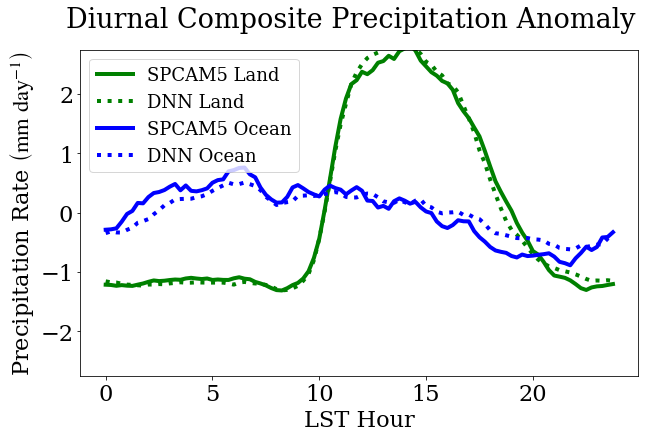

In [69]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(timing, land_anon_lst_precip_SPCAM5_composite, color = "g", label="SPCAM5 Land")
ax.plot(timing, land_anon_lst_precip_DNN_composite, color = "g",linestyle=':', label="DNN Land")
ax.plot(timing, ocean_anon_lst_precip_SPCAM5_composite, color="b", label="SPCAM5 Ocean")
ax.plot(timing, ocean_anon_lst_precip_DNN_composite, color="b",linestyle=':', label="DNN Ocean")
ax.set_ylabel("Precipitation Rate "+ r'$\left(\mathrm{mm \ day^{-1}}\right)$')
ax.set_xlabel("LST Hour")
ax.legend(fontsize=fz*0.8)
ax.set_ylim(-2.75,2.75)

plt.suptitle("Diurnal Composite Precipitation Anomaly")
plt.subplots_adjust(wspace=0.05)

plt.savefig("Test_Figures/Anon_Precip_Masked.png")
plt.savefig("Test_Figures/Anon_Precip_Masked.pdf")

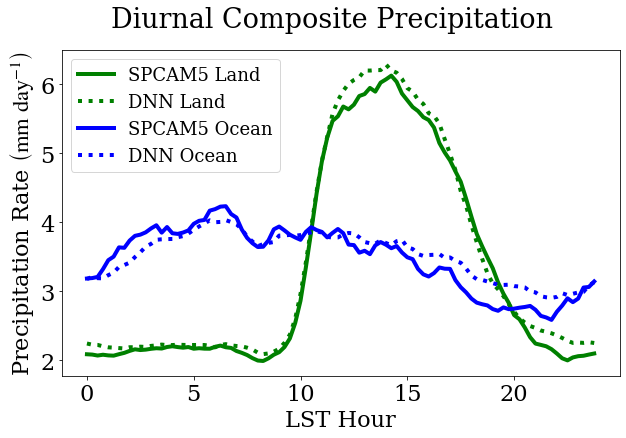

In [70]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(timing, land_final_lst_precip_SPCAM5_composite, color = "g", label="SPCAM5 Land")
ax.plot(timing, land_final_lst_precip_DNN_composite, color = "g",linestyle=':', label="DNN Land")
ax.plot(timing, ocean_final_lst_precip_SPCAM5_composite, color="b", label="SPCAM5 Ocean")
ax.plot(timing, ocean_final_lst_precip_DNN_composite, color="b",linestyle=':', label="DNN Ocean")
ax.set_ylabel("Precipitation Rate "+ r'$\left(\mathrm{mm \ day^{-1}}\right)$')
ax.set_xlabel("LST Hour")
ax.legend(fontsize=fz*0.8)
#ax.set_ylim(-2.75,2.75)

plt.suptitle("Diurnal Composite Precipitation")
plt.subplots_adjust(wspace=0.05)

plt.savefig("Test_Figures/Final_Precip_Masked.png")
plt.savefig("Test_Figures/Final_Precip_Masked.pdf")